## Observations and Insights 

1. Capomulin and Ramicane show the highest overall success rate over the course of the treatment with average tumor volumes  more than 10mm3 smaller than any other treatment regimen.

2. Tumor size of Capomulin test mouse s710 did not go down consistently or gradually, and shows another increase in size after bottoming out just before the end of the test period.

3. The correlation coefficient between mouse weight and tumor volume is 0.84.

# Code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
skincancerlabs_df = pd.merge(mouse_metadata_df, study_results_df, on = "Mouse ID", how="left")

# Display the data table for preview
skincancerlabs_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice and records.
skincancerlabs_df["Mouse ID"].nunique(), skincancerlabs_df["Mouse ID"].count()

(249, 1893)

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = skincancerlabs_df[skincancerlabs_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRowsDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
ErrantMouse = skincancerlabs_df[skincancerlabs_df['Mouse ID'] == "g989"] 
ErrantMouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping all data for the mouse with duplicate records by its ID.
skincancerlabs_clean_df = skincancerlabs_df[skincancerlabs_df != "g989"]
# skincancerlabs_clean_df.head()

In [6]:
# Checking the number of mice and number of records in the clean DataFrame.
skincancerlabs_clean_df["Mouse ID"].nunique(), skincancerlabs_clean_df["Mouse ID"].count()

(248, 1880)

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

skincancerlabs_grouped = skincancerlabs_clean_df.groupby("Drug Regimen")
#skincancerlabs_grouped_df.head()

regimen_mean = skincancerlabs_grouped["Tumor Volume (mm3)"].mean()
regimen_median  = skincancerlabs_grouped["Tumor Volume (mm3)"].median()
regimen_variance = skincancerlabs_grouped["Tumor Volume (mm3)"].var()
regimen_stdeviation = skincancerlabs_grouped["Tumor Volume (mm3)"].std()
regimen_sem = skincancerlabs_grouped["Tumor Volume (mm3)"].sem()

# print(regimen_mean, regimen_median, regimen_variance, regimen_stdeviation, regimen_sem)

skincancerlabs_summary_df = pd.DataFrame({"Tumor Volume Mean" : regimen_mean,
                                       "Tumor Volume Median" : regimen_median,
                                       "Tumor Volume Variance" : regimen_variance,
                                       "Tumor Volume Standard Deviation" : regimen_stdeviation,
                                       "Tumor Volume SEM" : regimen_sem})
skincancerlabs_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
Labs_Grouped = skincancerlabs_clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ['mean', 'median', "var", "std", "sem"]})
Labs_Grouped

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Treatment Regimen')

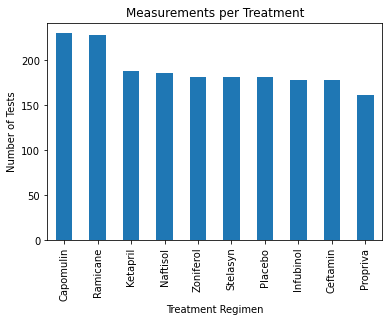

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
skincancerlabs_clean_df.groupby("Drug Regimen").size().sort_values(ascending=False).plot(kind="bar")
plt.title("Measurements per Treatment")
plt.ylabel("Number of Tests")
plt.xlabel("Treatment Regimen")

<function matplotlib.pyplot.show(close=None, block=None)>

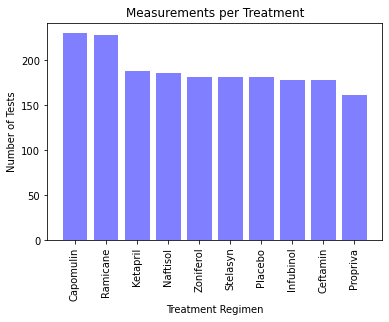

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
Data = skincancerlabs_clean_df.groupby("Drug Regimen").size().sort_values(ascending=False)
# Data
x_axis = np.arange(len(Data))
ticks = [value for value in x_axis]

plt.bar(x_axis, Data, color='b', alpha=0.5, align="center")
plt.xticks(ticks, Data.index.values, rotation="vertical")
plt.title("Measurements per Treatment")
plt.ylabel("Number of Tests")
plt.xlabel("Treatment Regimen")
plt.show

Text(0, 0.5, '')

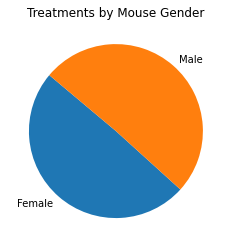

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
skincancerlabs_clean_df.groupby("Sex").size().plot(kind="pie", startangle=140)
plt.title("Treatments by Mouse Gender")
plt.ylabel("")

<function matplotlib.pyplot.show(close=None, block=None)>

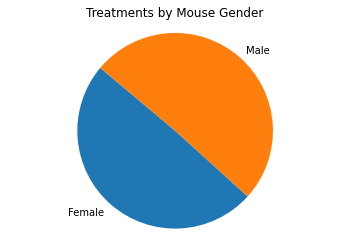

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Data = skincancerlabs_clean_df.groupby("Sex").size()
# print(Data)
plt.pie(Data, labels=Data.index, startangle=140)
plt.axis("equal")
plt.title("Treatments by Mouse Gender")
plt.show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

TopFour_df = skincancerlabs_clean_df[skincancerlabs_clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
#TopFour_df.head()

TopFourLastTP_df = TopFour_df.loc[TopFour_df.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].idxmax()].reset_index()
#TopFourLastTP_df

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
TumorVolumes = []

# tumorvolumes = TopFourLastTP_df["Tumor Volume (mm3)"]

for TreatmentName in Treatments:

    TumorVolumes_df = TopFourLastTP_df.loc[TopFourLastTP_df['Drug Regimen'] == TreatmentName]
    Volumes = TumorVolumes_df['Tumor Volume (mm3)']
    TumorVolumes.append(Volumes)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = Volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"{TreatmentName}: ")
    print(f"   Lower quartile: {lowerq}")
    print(f"   Upper quartile: {upperq}")
    print(f"   Interquartile: {iqr}")
    print(f"   Median: {quartiles[0.5]}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"   Values below {lower_bound} could be outliers")
    print(f"   Values above {upper_bound} could be outliers")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset

    # Determine outliers using upper and lower bounds and I don't think this is working for me
    outliers = Volumes.loc[(TumorVolumes_df['Tumor Volume (mm3)'] < lower_bound) | (TumorVolumes_df['Tumor Volume (mm3)'] > upper_bound)]
    print(outliers)

Capomulin: 
   Lower quartile: 32.37735684
   Upper quartile: 40.1592203
   Interquartile: 7.781863460000004
   Median: 38.125164399999996
   Values below 20.70456164999999 could be outliers
   Values above 51.83201549 could be outliers
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: 
   Lower quartile: 31.56046955
   Upper quartile: 40.65900627
   Interquartile: 9.098536719999998
   Median: 36.56165229
   Values below 17.912664470000003 could be outliers
   Values above 54.30681135 could be outliers
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: 
   Lower quartile: 54.04860769
   Upper quartile: 65.52574285
   Interquartile: 11.477135160000003
   Median: 60.16518046
   Values below 36.83290494999999 could be outliers
   Values above 82.74144559000001 could be outliers
55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: 
   Lower quartile: 48.72207785
   Upper quartile: 64.29983003
   Interquartile: 15.577752179999997
   Median: 59.8519555

Text(0.5, 0, 'Treatment Regimen')

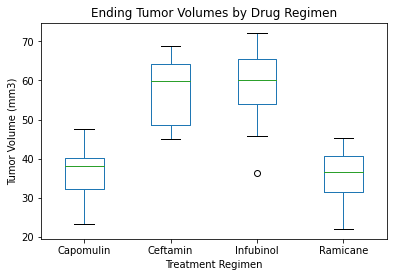

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
TopFourTumorVol_df = pd.DataFrame(TopFourLastTP_df, columns = ["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"])

TopFourTumorVol_df.boxplot(by ='Drug Regimen', column =['Tumor Volume (mm3)'], grid = False) 
plt.title("Ending Tumor Volumes by Drug Regimen")
plt.suptitle("")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Treatment Regimen")

## Line and Scatter Plots

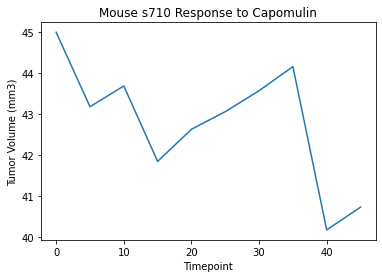

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = TopFour_df[TopFour_df['Drug Regimen'].isin(['Capomulin'])]
# Capomulin_df["Mouse ID"].unique()

# Mouse picked: s710
Mouse = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "s710"]
# Mouse

# Generate plot
plt.plot(Mouse['Timepoint'],Mouse['Tumor Volume (mm3)'])
plt.title("Mouse s710 Response to Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.show()

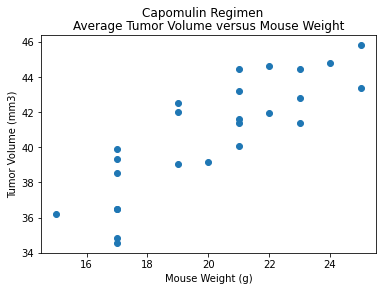

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
MouseWeight = Capomulin_df.groupby("Mouse ID")
# MouseWeight.head()

x_values = MouseWeight['Weight (g)'].mean()
y_values = MouseWeight['Tumor Volume (mm3)'].mean()
plt.scatter(x_values,y_values)
plt.suptitle('Capomulin Regimen')
plt.title('Average Tumor Volume versus Mouse Weight')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84.


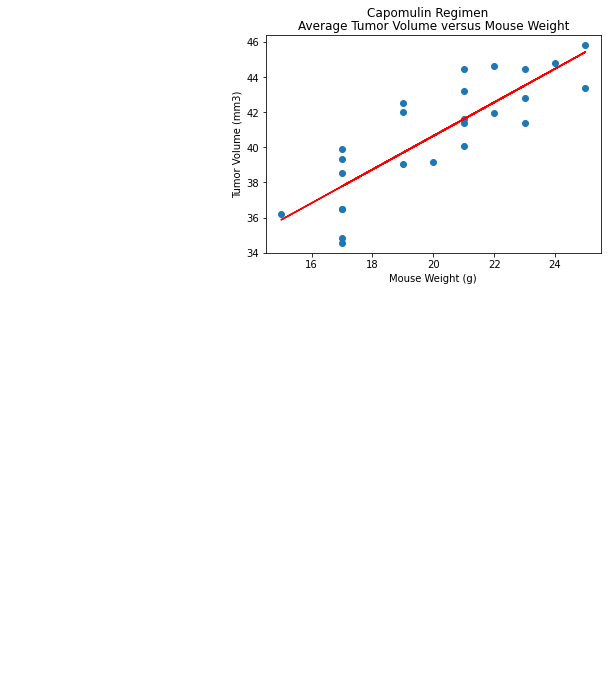

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# (imported scipy.stats linregress)
x_values = MouseWeight['Weight (g)'].mean()
y_values = MouseWeight['Tumor Volume (mm3)'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.suptitle('Capomulin Regimen')
plt.title('Average Tumor Volume versus Mouse Weight')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}.")
plt.show()